# FTIR-EBSD project

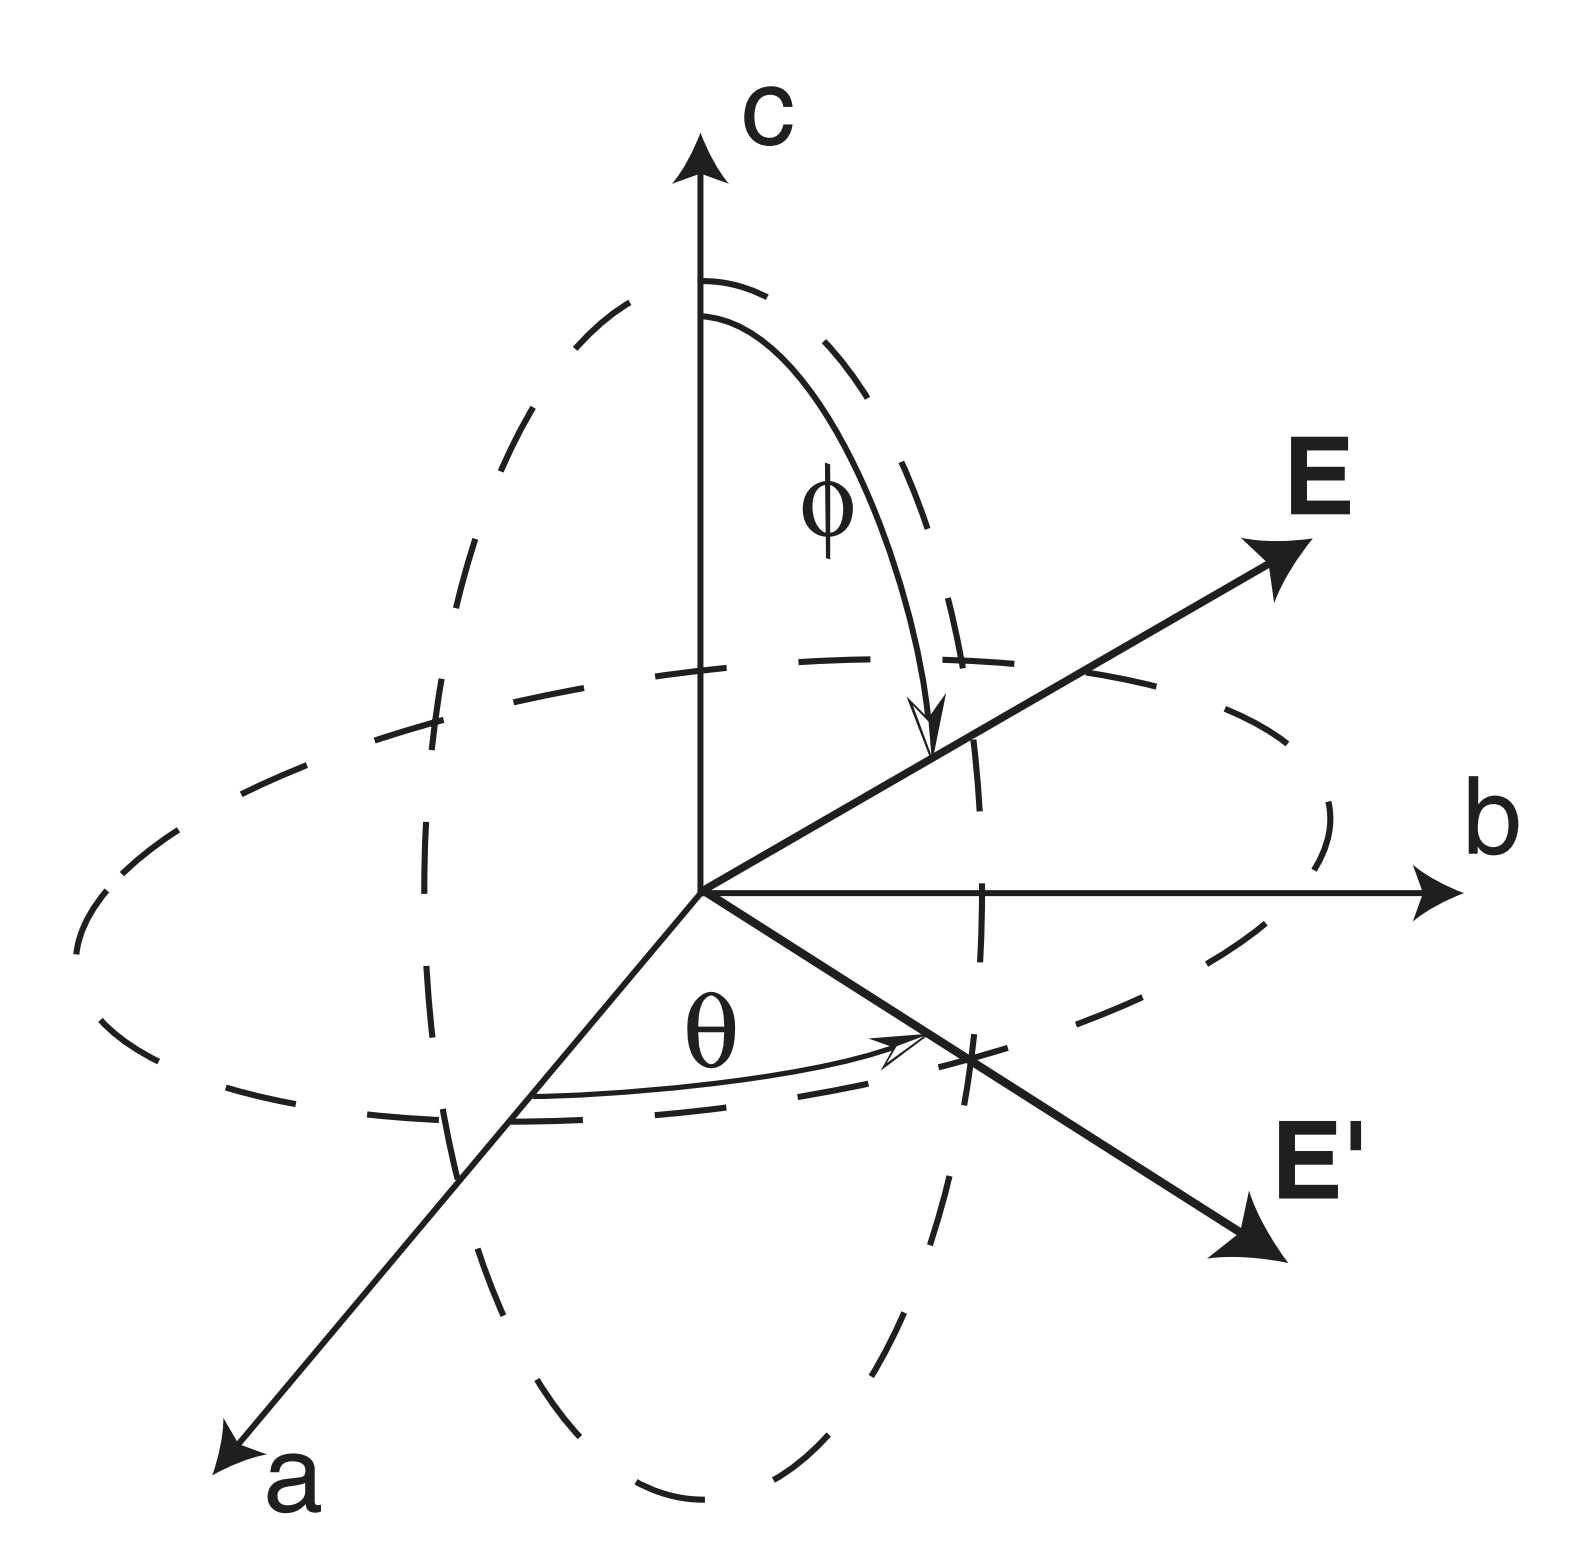

FIGURE 1. The coordinate system in which the orientation of the polarization vector E of FTIR measurement is expressed, relative to the a, b, and c axes of an orthorhombic crystal. Vector E' is the projection of E onto the (a-b) plane. Angle $\theta$ is the azimuth of E' in the (a-b) plane, measured from the a-axis, and $\phi$ is the angle between E and the c-axis. By convention, both θ and φ are reported in the domain 0 to 90°, as the optical properties are symmetrical with respect to reflection about the (a-b), (b-c), and (a-c) planes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.transform import Rotation as r
from scipy.optimize import curve_fit


In [2]:
Ta = 90 # x // [100]
Tb = 50 # y // [010]
Tc = 20 # z // [001]

# Genereting the absorbance figure
## POLAR COORDINATES
generate a matrix containing lineary distributed values of azimuth and elevation elevation for the function sph2car

azimuth (phi) is the counterclockwise angle in the x-y plane measured in radians from the positive x-axis.

elevation (theta) is the angle in radians from the vertical z-direction.



## Transmition along any direction given in polar coordinates

In [3]:
# phi is measured from the z (vertical) direction
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# T is the magnitud of the vector (rho) in polar coordinates
T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
    Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
    Tc * np.cos(phi)**2;


In [4]:
# Express the mesh in the cartesian coordinates
x = T * np.sin(phi) * np.cos(theta)
y = T * np.sin(phi) * np.sin(theta)
z = T * np.cos(phi)

# normalize colors to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

Text(0.5, 0, '$z$')

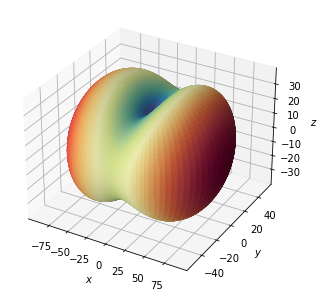

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(x, y, z, vmax=T.max(), vmin=Tmin, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

#ax.set_box_aspect((1, 1, 1)) # ensure equal aspect ratio

In [64]:
#Show the same figure in an interactive window (you can use "osx" in mac instead of qt I think)
%matplotlib qt

fig3, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.5, antialiased=True)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

plt.show()

## Horizontal section

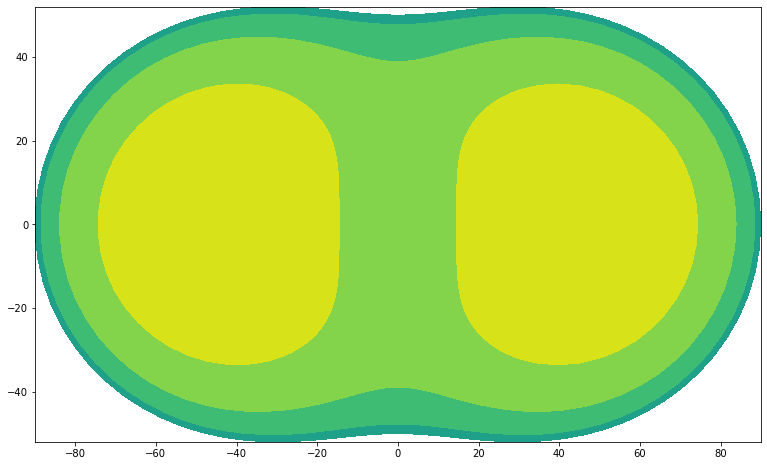

In [24]:
fig, ax = plt.subplots(figsize=(13,8))
ax.contourf(x,y,z)

(100, 100)

## Try to make a rotation using scipy Rotation from spatial.transform

for details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html

In [25]:
from scipy.spatial.transform import Rotation as r

#define a rotation in euler space
rotation = r.from_euler('z', 45, degrees=True)
rotation.as_euler('zxy', degrees=True)

array([45.,  0.,  0.])

In [26]:
# store the differenet coordinates in a 3D numpy array (100 x 100 x 3)
# third dimension (index 2) are x, y, and z respectively
coordinates = np.dstack((x,y,z))


In [27]:
# rotate all the coordinates using the rotation matrix
# this means multiplying the inverse of the rotation matrix
# using the matrix multiplication operator @
new_coordinates = coordinates @ rotation.as_matrix().T

Text(0.5, 0, '$z$')

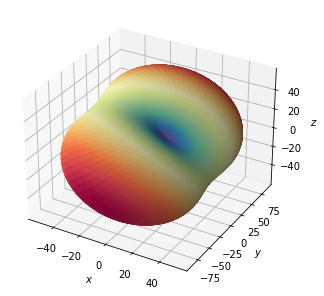

In [69]:
# back to inline plotting backend
%matplotlib inline 

# make figure
fig4, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(new_coordinates[:,:,0], new_coordinates[:,:,1], new_coordinates[:,:,2], rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

In [29]:
#define a rotation in euler space
new_rotation = r.from_euler('zxz', [30, 45, 60], degrees=True)

# apply new rotation
new_coordinates = coordinates @ new_rotation.as_matrix().T

Text(0.5, 0, '$z$')

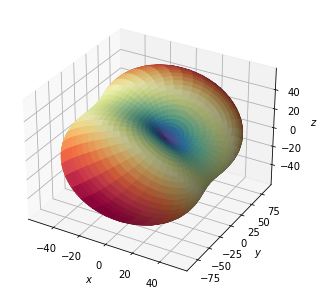

In [30]:
fig5, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(new_coordinates[:,:,0], new_coordinates[:,:,1], new_coordinates[:,:,2], facecolors=cm.Spectral_r(Tcolors))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

In [33]:
def sph2cart(phi, theta, T):
    """ TODO
    """
    
    x = T * np.sin(phi) * np.cos(theta)
    y = T * np.sin(phi) * np.sin(theta)
    z = T * np.cos(phi)
    
    return x, y, z
    

def generate_T_mesh(density=50):
    """ TODO
    """
    
    # generate the mesh
    phi, theta = np.meshgrid(np.linspace(0, np.pi, density), \
                             np.linspace(0, 2*np.pi, density))
    
    # set olivine Ta, Tb, and Tc values
    Ta, Tb, Tc = 90, 50, 20
    
    # estimate T values
    T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
        Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
        Tc * np.cos(phi)**2;
    
    # # Express the mesh in the cartesian coordinates
    x, y, z = sph2cart(phi, theta, T)
    
    return np.dstack((x,y,z))

def func(T, a, b, c):
    """ Comment...TODO
    """
    
    # generate the rotation in euler space (Bunge convention)
    rotation = r.from_euler('zxz', [a, b, c], degrees=True)
    
    return T @ rotation.as_matrix().T

## Test for making sections using contour plots

In [70]:
# generate 20 points
T = generate_T_mesh(density=100)
x = T[:, :, 0]
y = T[:, :, 1]
z = T[:, :, 2]

T_rotated = func(T, 33, 89, 5)
x = T_rotated[:, :, 0]
y = T_rotated[:, :, 1]
z = T_rotated[:, :, 2]

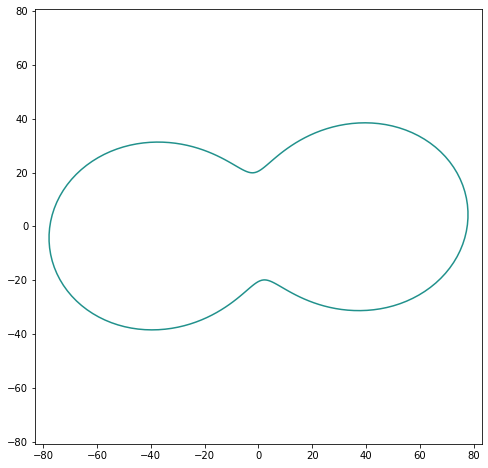

In [72]:
fig, ax = plt.subplots(figsize=(8,8))
cs = ax.contour(x,y,z, 0)
ax.axis('equal')
plt.show()

The `Tmodel` variable is the data to compare with the observations in x and y coordinates. Eventually it can be transformed into polar coordinates

In [77]:
Tmodel = cs.allsegs

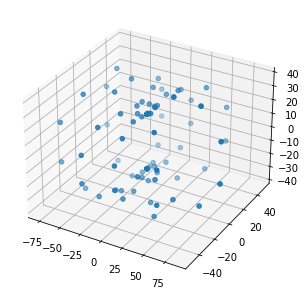

In [18]:
fig6, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.scatter(x, y, z)

In [64]:
curve_fit(func, T, p0=(1, 1, 1))

TypeError: curve_fit() missing 1 required positional argument: 'ydata'

In [63]:
p = func(T, 45, 0, 0)
p.shape, type(p) 

((10, 10, 3), numpy.ndarray)

In [58]:
T.shape

(10, 10, 3)

In [60]:
rotation = r.from_euler('zxz', [45, 0, 0], degrees=True)
T @ rotation.as_matrix().T

array([[[ 0.00000000e+00,  0.00000000e+00,  2.00000000e+01],
        [ 6.81722767e+00,  6.81722767e+00,  2.64884733e+01],
        [ 2.22361445e+01,  2.22361445e+01,  3.74766666e+01],
        [ 4.43970016e+01,  4.43970016e+01,  3.62500000e+01],
        [ 6.12029250e+01,  6.12029250e+01,  1.52618067e+01],
        [ 6.12029250e+01,  6.12029250e+01, -1.52618067e+01],
        [ 4.43970016e+01,  4.43970016e+01, -3.62500000e+01],
        [ 2.22361445e+01,  2.22361445e+01, -3.74766666e+01],
        [ 6.81722767e+00,  6.81722767e+00, -2.64884733e+01],
        [ 1.73191211e-15,  1.73191211e-15, -2.00000000e+01]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.00000000e+01],
        [ 7.82640236e-01,  8.94561884e+00,  2.46717693e+01],
        [ 2.35820211e+00,  2.69543735e+01,  3.22456760e+01],
        [ 4.53664961e+00,  5.18541423e+01,  3.00523613e+01],
        [ 6.16791021e+00,  7.04995363e+01,  1.24784547e+01],
        [ 6.16791021e+00,  7.04995363e+01, -1.24784547e+01],
        [ 4.53664961e+

# Alternative approach using minimize instead of curve_fit

In [19]:
## Generate the "observed data"
# generate the mesh
phi, theta = np.meshgrid(np.linspace(0, np.pi, 20), \
                         np.linspace(0, 2*np.pi, 20))
    
# set olivine Ta, Tb, and Tc values
Ta, Tb, Tc = 90, 50, 20
    
# estimate T values
T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
Tc * np.cos(phi)**2;
    
# # Express the mesh in the cartesian coordinates
x, y, z = sph2cart(phi, theta, T)
    
T = np.dstack((x,y,z))

# T is constant and the rotation matrix is the independent variable
T_obs = func(T, 0, 45, 0)

One option would be to minimize the difference in a least squared sense of the following function, i.e. solving an optimization problem. As written below the problem is multivariate or multidimensional as $x \in \mathbb{R}^n $, where $n=3$ in the present case.

In [22]:
def objective(x):
    rotation = r.from_euler('zxz', [x[0], x[1], x[2]], degrees=True)
    return T_obs - T @ rotation.as_matrix().T

In [27]:
from scipy.optimize import least_squares

In [28]:
x0 = np.array([0, 0, 0])
least_squares(objective, x0)

ValueError: `fun` must return at most 1-d array_like. f0.shape: (20, 20, 3)

In [30]:
x

4

In [31]:
y

2